<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryNotebooks/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binomial logistic regression**

The purpose of this notebook is to understand the value of using logistic regression to make predictions for a dependent varaible based on one independent variable.  

The example dataset will be for an airline that wants to know if better in-flight entertainment leads to customer satisfaction

In [1]:
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:

#https://docs.google.com/spreadsheets/d/1BIf-kLmYePqws6YQXO9tc3CCgU05anbMLe2z2DFR-j0/edit?usp=sharing

sheet_id = "1BIf-kLmYePqws6YQXO9tc3CCgU05anbMLe2z2DFR-j0"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

satisfaction   customer_type  age   type_of_travel     class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   flight_distance  seat_comfort  departure_arrival_time_convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   food_and_drink  gate_location  ...  online_support  ease_of_online_booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   on-board_service  leg_room_service  baggage_handling  checkin_service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   cleanliness  online_boarding  departure_delay_in_minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   arrival_delay_in_minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]

In [4]:
# dependent variable is satisfaction and we have a lot of other variables that we can use
df.dtypes

satisfaction                          object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
dtype: object

In [6]:
# there is a pretty even distribution of satisfied and dissatisfied customers
df.satisfaction.value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [8]:
# look for missing values - nice and clean dataset except for arrival delay in mins
df.isnull().sum()

satisfaction                           0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

In [10]:
# drop the rows with missing values because it is a small loss compared to the big picture
df = df.dropna(axis=0).reset_index(drop=True)

In [23]:
# to create a regplot, the independent variable inflight entertainmentt can't be int and satisfaction can't be object
df.inflight_entertainment = df.inflight_entertainment.astype(float)
df.satisfaction = OneHotEncoder(drop='first').fit_transform(df[['satisfaction']]).toarray()
df.head()

satisfaction   customer_type  age   type_of_travel     class  \
0           1.0  Loyal Customer   65  Personal Travel       Eco   
1           1.0  Loyal Customer   47  Personal Travel  Business   
2           1.0  Loyal Customer   15  Personal Travel       Eco   
3           1.0  Loyal Customer   60  Personal Travel       Eco   
4           1.0  Loyal Customer   70  Personal Travel       Eco   

   flight_distance  seat_comfort  departure_arrival_time_convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   food_and_drink  gate_location  ...  online_support  ease_of_online_booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   on-board_service  leg_room_service  baggage_handling  checkin_service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   cleanliness  online_boarding  departure_delay_in_minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   arrival_delay_in_minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]

In [15]:
# put 70% of the data into a training set and the rest into a testing set, separate the variables into an X and y dataset

X = df[['inflight_entertainment']]
y = df.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [16]:
# build the logistic regression model

clf = LogisticRegression().fit(X_train,y_train)

In [19]:
# for every 1 unit increase in inflight entertainment score, the log-odds of satisfaction increase by 1.007
# this positive coefficient means that better entertainment makes passengers more likely to be satisfied
clf.coef_

array([[1.00733978]])

In [18]:
# the intercept represents the log-odds of satisfaction when inflight entertainment = 0
clf.intercept_

array([-3.2355686])

The full equation in terms of log-odds is:

log(p / (1 - p)) = 1.0073 * inflight_entertainment - 3.2356

<Axes: xlabel='inflight_entertainment', ylabel='satisfaction'>

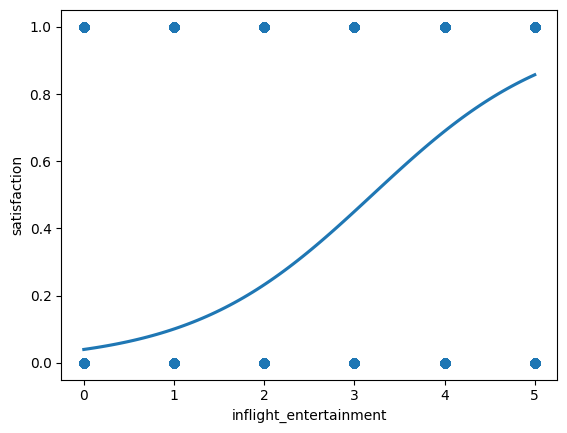

In [24]:
sns.regplot(x='inflight_entertainment', y='satisfaction',data=df, logistic=True, ci=None)

In [22]:
df[['inflight_entertainment','satisfaction']].dtypes

inflight_entertainment     object
satisfaction              float64
dtype: object

In [25]:
# time to test the model
y_pred = clf.predict(X_test)

In [26]:
clf.predict_proba(X_test)

array([[0.31135535, 0.68864465],
       [0.90275598, 0.09724402],
       [0.14171353, 0.85828647],
       ...,
       [0.77221996, 0.22778004],
       [0.55318535, 0.44681465],
       [0.31135535, 0.68864465]])

In [27]:
# we evaluate the model on accuracy, precision, recall and F1 score

metric_funcs = {
    'Accuracy': metrics.accuracy_score,
    'Precision': metrics.precision_score,
    'Recall': metrics.recall_score,
    'F1': metrics.f1_score
}

for name, func in metric_funcs.items():
  print(f"{name}; {'%.6f' % func(y_test, y_pred)}")

Accuracy; 0.801150
Precision; 0.818165
Recall; 0.820458
F1; 0.819310


✅ Accuracy (0.801150)
What it means:
The percentage of total predictions the model got right.
Interpretation:
About 80.1% of the time, the model correctly predicted satisfaction or dissatisfaction.

🎯 Precision (0.818165)
What it means:
Of all the times the model predicted "satisfied", how often it was actually correct.
Interpretation:
When the model says someone is satisfied, it's right about 81.8% of the time.

🔁 Recall (0.820458)
What it means:
Of all the people who were actually satisfied, how many the model correctly identified.
Interpretation:
The model correctly found 82.0% of all truly satisfied customers.

⚖️ F1 Score (0.819310)
What it means:
The harmonic mean of Precision and Recall — a balanced score that considers both.
Interpretation:
A strong F1 score of 81.9% shows good balance between finding satisfied customers and not making too many false positive predictions.

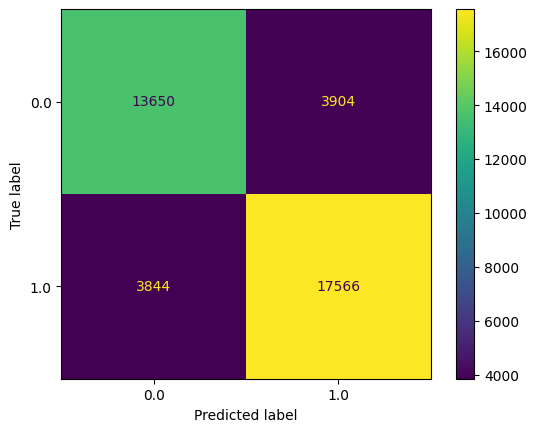

In [28]:
# confusion matrix to visualize the predictions

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Notes from the confusion matrix
- the false positives and false negatives quadrants are under 4000 which is relatively small while the true positives and true negatives are over 13000
- there isn't a large difference between the number of false positives and false negatives
- using more than a single independent variable could improve model performance